In [2]:
# Import required libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = "/content/diabetes.csv"  # Update with your file path
dataset = pd.read_csv(file_path)

# Handle missing or zero values
# Replace zeros with NaN in specific columns where zero is invalid
columns_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
dataset[columns_with_zeros] = dataset[columns_with_zeros].replace(0, np.nan)

# Replace NaN values with the median of the respective column
for column in columns_with_zeros:
    dataset[column].fillna(dataset[column].median(), inplace=True)

# Normalize the data (Min-Max Scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# List of numerical columns to scale (excluding the 'Outcome' column)
numerical_columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
                     "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])

# Save the cleaned dataset to a new file
cleaned_file_path = "cleaned_diabetes.csv"  # Specify your save path
dataset.to_csv(cleaned_file_path, index=False)

print(f"Data preprocessing complete. Cleaned dataset saved to {cleaned_file_path}.")


Data preprocessing complete. Cleaned dataset saved to cleaned_diabetes.csv.


<ipython-input-2-fad5ec911e6e>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[column].fillna(dataset[column].median(), inplace=True)


<ipython-input-4-dca84a918dae>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Outcome", data=dataset, palette="coolwarm")


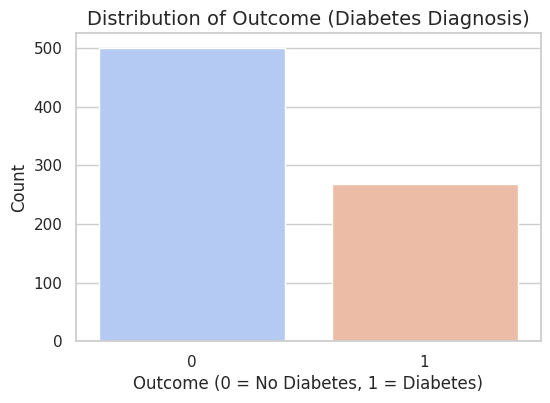

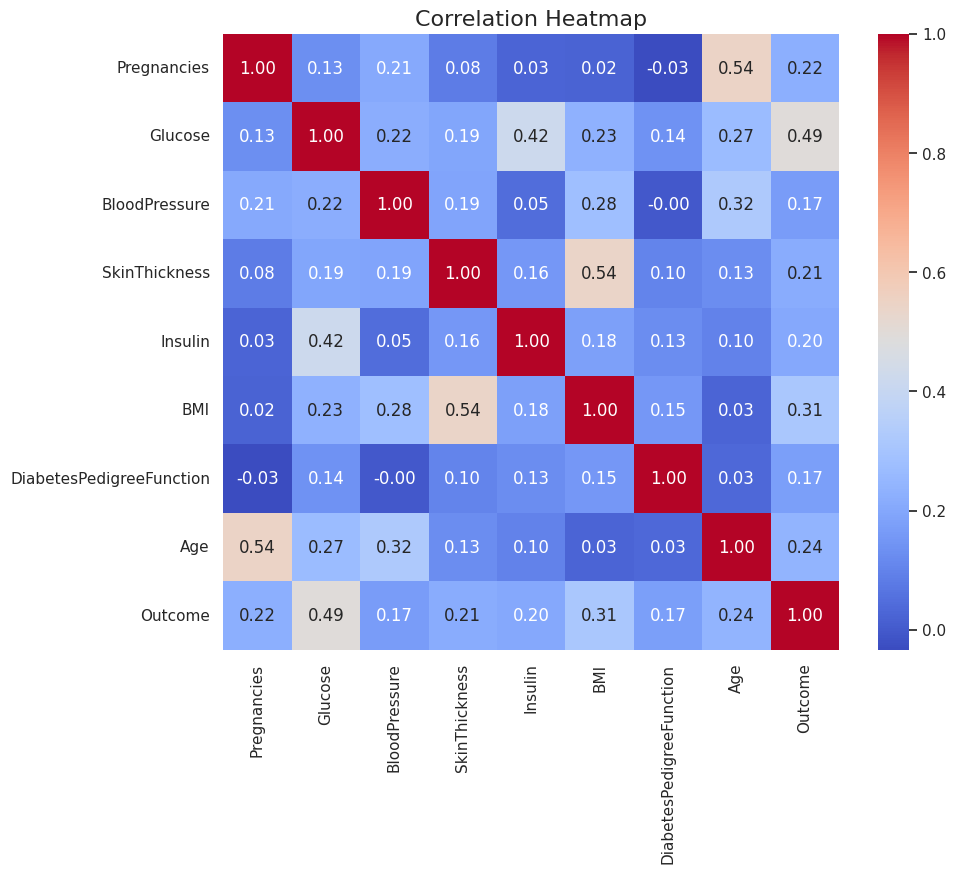

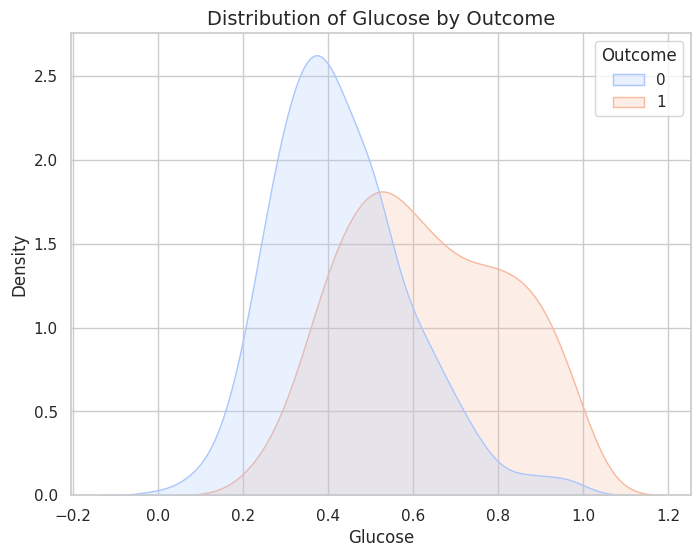

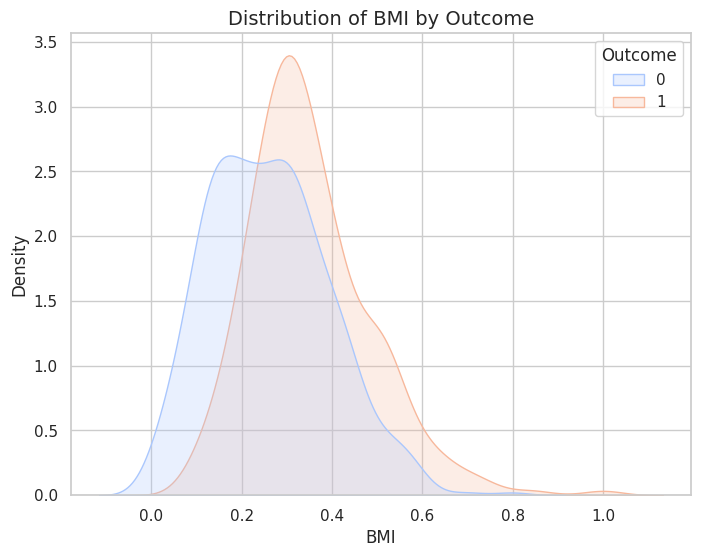

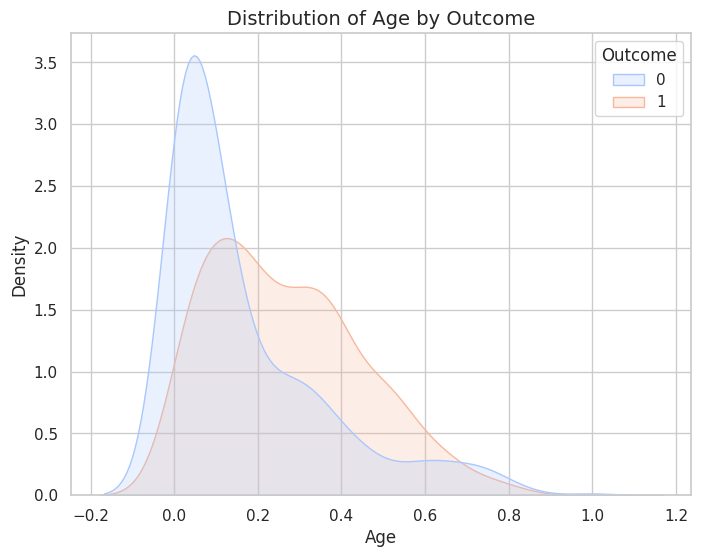

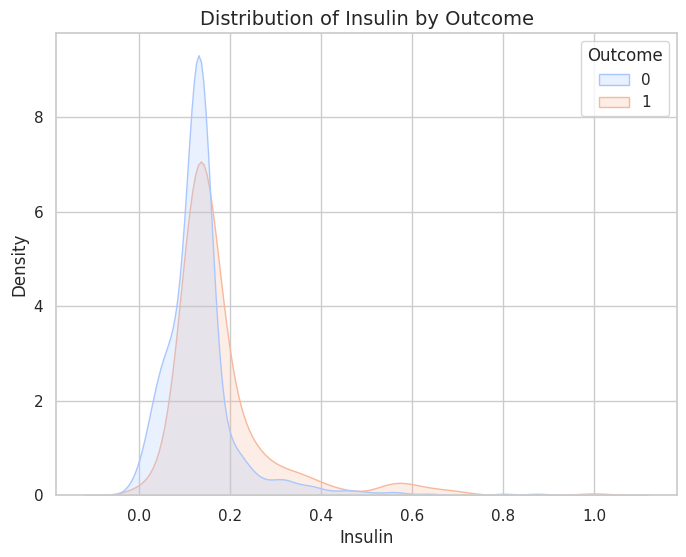

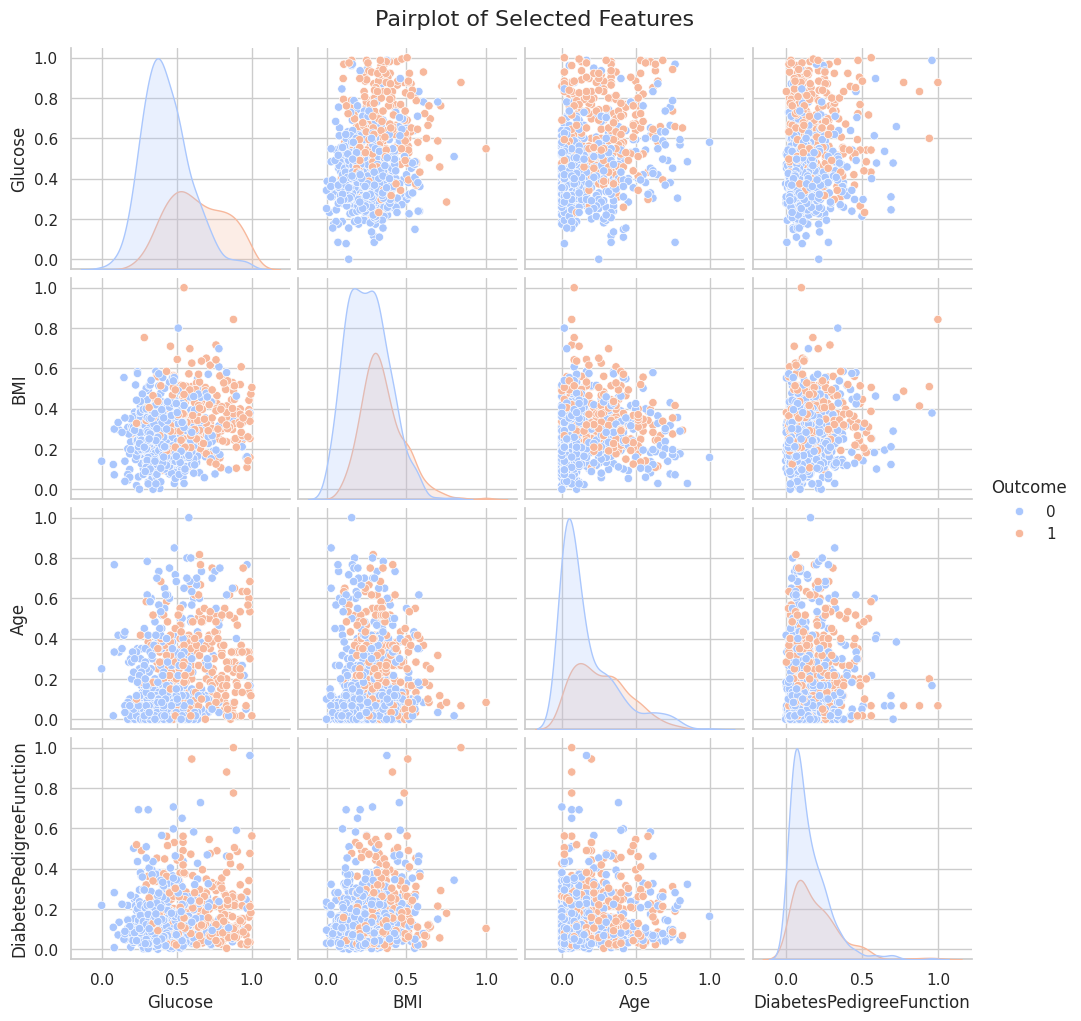

<ipython-input-4-dca84a918dae>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y="Glucose", data=dataset, palette="coolwarm")


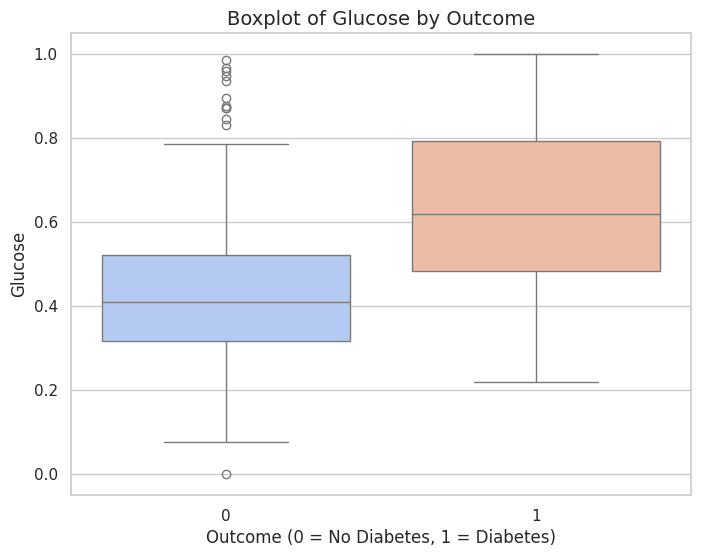

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = "/content/cleaned_diabetes.csv"  # Update with your cleaned dataset file path
dataset = pd.read_csv(file_path)

# Set up the style for the visualizations
sns.set(style="whitegrid")

# 1. Distribution of Outcome
plt.figure(figsize=(6, 4))
sns.countplot(x="Outcome", data=dataset, palette="coolwarm")
plt.title("Distribution of Outcome (Diabetes Diagnosis)", fontsize=14)
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# 3. Distribution of Key Features by Outcome
features_to_plot = ["Glucose", "BMI", "Age", "Insulin"]
for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=dataset, x=feature, hue="Outcome", fill=True, common_norm=False, palette="coolwarm")
    plt.title(f"Distribution of {feature} by Outcome", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.show()

# 4. Pairplot of Selected Features
selected_features = ["Glucose", "BMI", "Age", "DiabetesPedigreeFunction", "Outcome"]
sns.pairplot(dataset[selected_features], hue="Outcome", diag_kind="kde", palette="coolwarm")
plt.suptitle("Pairplot of Selected Features", y=1.02, fontsize=16)
plt.show()

# 5. Boxplot for Glucose and Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x="Outcome", y="Glucose", data=dataset, palette="coolwarm")
plt.title("Boxplot of Glucose by Outcome", fontsize=14)
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)", fontsize=12)
plt.ylabel("Glucose", fontsize=12)
plt.show()


Model Evaluation:
Mean Squared Error (MSE): 0.02
Mean Absolute Error (MAE): 0.10
R-Squared (R2 Score): 0.05


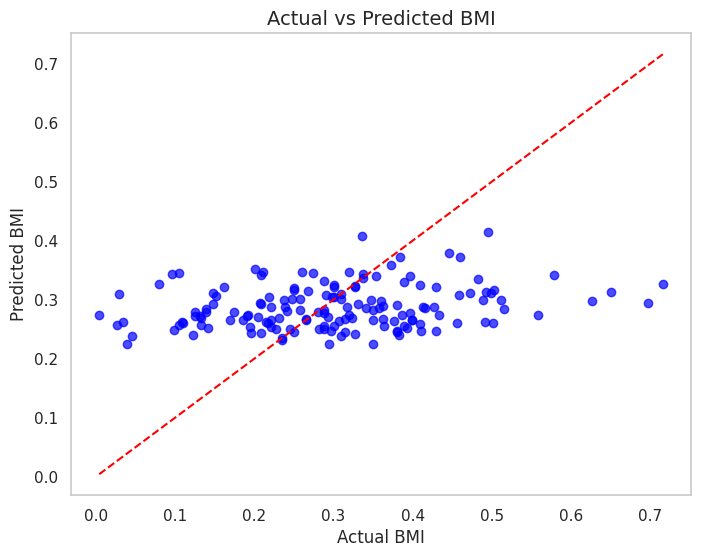

In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
file_path = "/content/cleaned_diabetes.csv"  # Update with your cleaned dataset file path
dataset = pd.read_csv(file_path)

# Select features (independent variables) and target (dependent variable)
# For regression, choose continuous variables (e.g., Glucose predicting BMI)
X = dataset[["Glucose", "Age", "Insulin"]]  # Independent variables
y = dataset["BMI"]  # Target variable (continuous)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-Squared (R2 Score): {r2:.2f}")

# Visualize actual vs predicted BMI
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted BMI", fontsize=14)
plt.xlabel("Actual BMI", fontsize=12)
plt.ylabel("Predicted BMI", fontsize=12)
plt.grid()
plt.show()


Model Evaluation:
Accuracy: 0.73

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.71      0.77        99
           1       0.59      0.76      0.67        55

    accuracy                           0.73       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.75      0.73      0.73       154



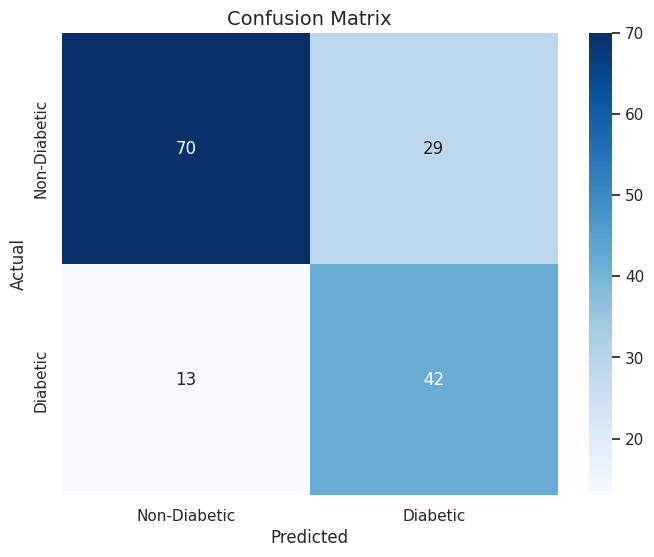

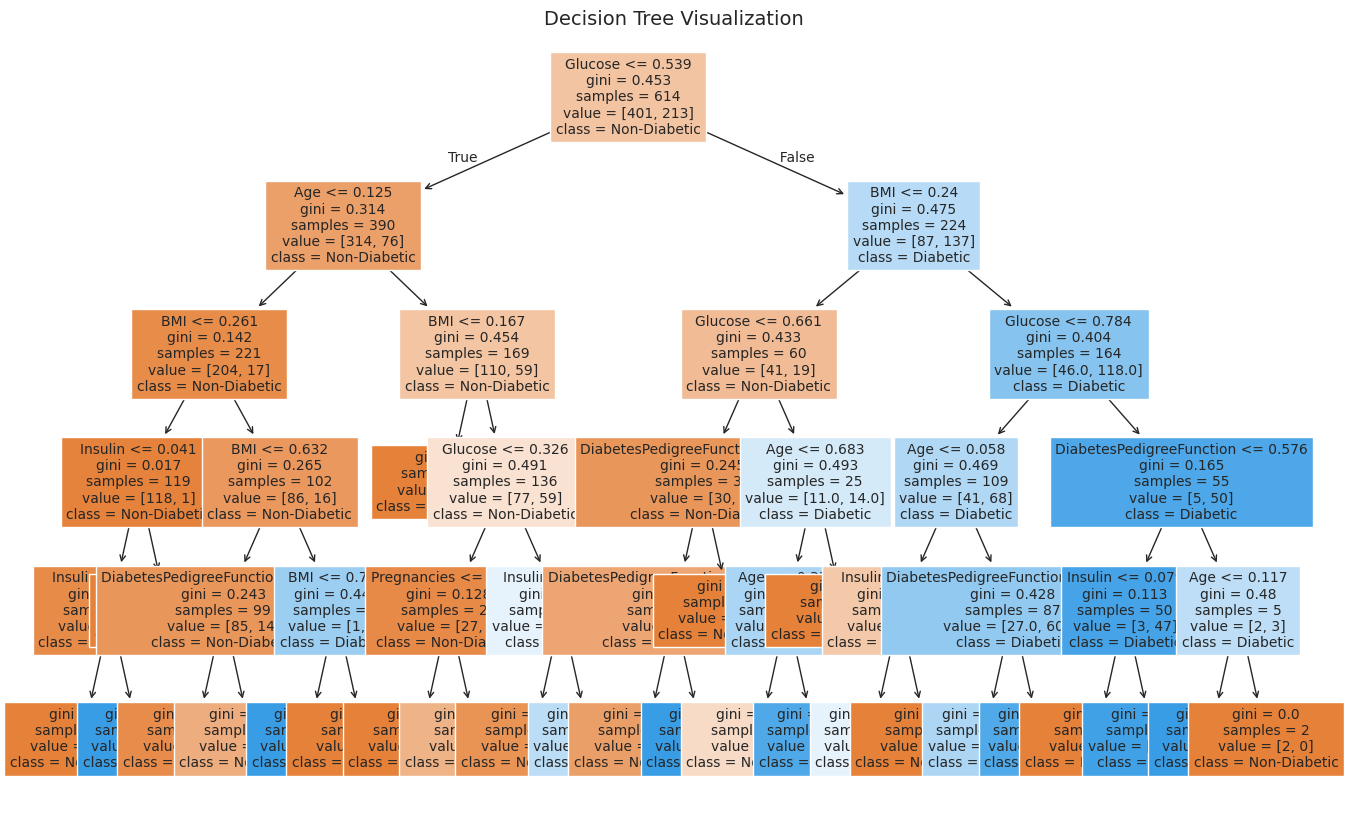

Decision Tree Rules:
|--- Glucose <= 0.54
|   |--- Age <= 0.13
|   |   |--- BMI <= 0.26
|   |   |   |--- Insulin <= 0.04
|   |   |   |   |--- Insulin <= 0.04
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Insulin >  0.04
|   |   |   |   |   |--- class: 1
|   |   |   |--- Insulin >  0.04
|   |   |   |   |--- class: 0
|   |   |--- BMI >  0.26
|   |   |   |--- BMI <= 0.63
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.18
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DiabetesPedigreeFunction >  0.18
|   |   |   |   |   |--- class: 0
|   |   |   |--- BMI >  0.63
|   |   |   |   |--- BMI <= 0.78
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- BMI >  0.78
|   |   |   |   |   |--- class: 0
|   |--- Age >  0.13
|   |   |--- BMI <= 0.17
|   |   |   |--- class: 0
|   |   |--- BMI >  0.17
|   |   |   |--- Glucose <= 0.33
|   |   |   |   |--- Pregnancies <= 0.56
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Pregnancies >  0.56
|   |   |   |   |   |--- class: 0
|

In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/cleaned_diabetes.csv"  # Update with your cleaned dataset file path
dataset = pd.read_csv(file_path)

# Select features (independent variables) and target (dependent variable)
# Using "Outcome" as the target variable for classification
X = dataset.drop(columns=["Outcome"])  # Independent variables
y = dataset["Outcome"]  # Target variable (binary: 0 or 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42, max_depth=5)  # You can adjust hyperparameters like max_depth
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

# Visualize the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 10))
plot_tree(model, feature_names=X.columns, class_names=["Non-Diabetic", "Diabetic"], filled=True, fontsize=10)
plt.title("Decision Tree Visualization", fontsize=14)
plt.show()

# Export the decision tree rules as text
tree_rules = export_text(model, feature_names=list(X.columns))
print("Decision Tree Rules:")
print(tree_rules)


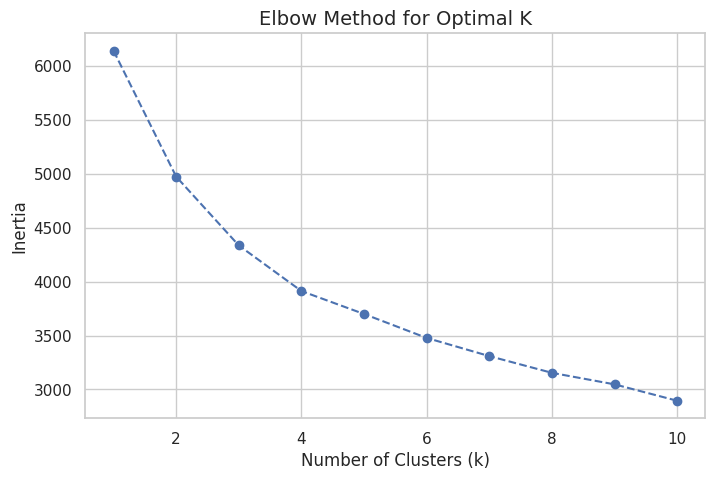

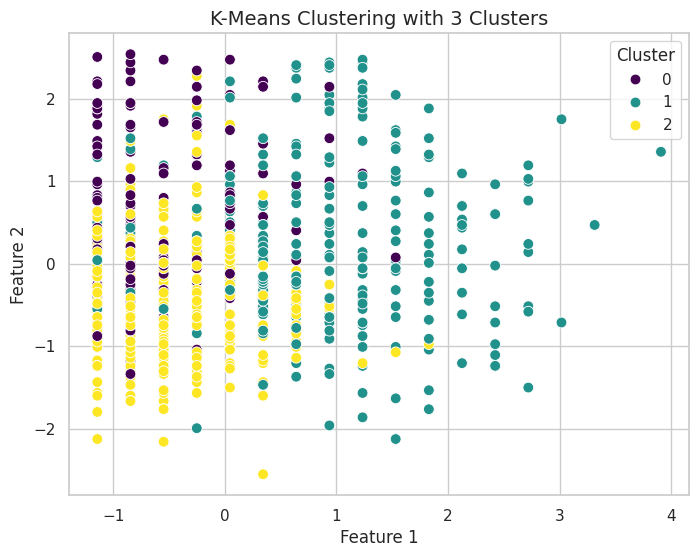

Cluster Centers:
[[-0.56189348  0.64829774  0.15534981  0.83535251  0.75648111  0.98518491
   0.44310522 -0.3328185 ]
 [ 1.02460067  0.26368576  0.50374541  0.13513212 -0.05375363  0.06330493
  -0.0522288   1.05415522]
 [-0.47885662 -0.5150779  -0.44872326 -0.51259734 -0.33415223 -0.53360723
  -0.18041213 -0.61388454]]
Clustered dataset saved as clustered_dataset.csv


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/cleaned_diabetes.csv"  # Replace with the path to your cleaned dataset
dataset = pd.read_csv(file_path)

# Drop the target column if it exists, as clustering is unsupervised
if "Outcome" in dataset.columns:
    dataset = dataset.drop(columns=["Outcome"])

# Normalize the data for better clustering performance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal K", fontsize=14)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
plt.show()

# Choose the optimal number of clusters (based on the Elbow Curve)
optimal_k = 3  # Adjust based on the elbow point observed in the curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original dataset
dataset['Cluster'] = cluster_labels

# Visualize the clusters (for the first two principal components or features)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=cluster_labels, palette="viridis", s=60)
plt.title(f"K-Means Clustering with {optimal_k} Clusters", fontsize=14)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.legend(title="Cluster")
plt.show()

# Print the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Save the dataset with clusters
output_file = "clustered_dataset.csv"
dataset.to_csv(output_file, index=False)
print(f"Clustered dataset saved as {output_file}")


In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load the cleaned dataset
file_path = "/content/cleaned_diabetes.csv"  # Replace with the path to your cleaned dataset
dataset = pd.read_csv(file_path)

# Separate features and target
X = dataset.drop(columns=["Outcome"])  # Features
y = dataset["Outcome"]  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optional: Interpret the significance of each metric
print("\nMetric Significance:")
print("1. Accuracy: Measures the overall correctness of the model.")
print("2. Precision: Measures the proportion of true positives among predicted positives.")
print("3. Recall: Measures the proportion of true positives out of actual positives.")
print("4. F1-Score: A harmonic mean of precision and recall, balancing both metrics.")


Model Evaluation Metrics:
Accuracy: 0.71
Precision: 0.60
Recall: 0.48
F1-Score: 0.54

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       100
           1       0.60      0.48      0.54        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.66       154
weighted avg       0.70      0.71      0.70       154


Metric Significance:
1. Accuracy: Measures the overall correctness of the model.
2. Precision: Measures the proportion of true positives among predicted positives.
3. Recall: Measures the proportion of true positives out of actual positives.
4. F1-Score: A harmonic mean of precision and recall, balancing both metrics.


In [12]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the cleaned dataset
file_path = "/content/cleaned_diabetes.csv"  # Replace with the path to your cleaned dataset
dataset = pd.read_csv(file_path)

# Separate features and target
X = dataset.drop(columns=["Outcome"])  # Features
y = dataset["Outcome"]  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:")
print(best_params)
print(f"Best Cross-Validation Score: {best_score:.2f}")

# Evaluate the tuned model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report for the Best Model:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Score: 0.78

Classification Report for the Best Model:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.67      0.57      0.62        54

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



In [13]:
 # Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the cleaned dataset
file_path = "/content/cleaned_diabetes.csv"  # Replace with the path to your cleaned dataset
dataset = pd.read_csv(file_path)

# Feature Engineering - Create new features
# Example: Body Mass Index categories
def bmi_category(row):
    if row['BMI'] < 18.5:
        return 'Underweight'
    elif 18.5 <= row['BMI'] < 24.9:
        return 'Normal weight'
    elif 25 <= row['BMI'] < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

dataset['BMI_Category'] = dataset.apply(bmi_category, axis=1)

# Convert BMI_Category to numerical values using one-hot encoding
dataset = pd.get_dummies(dataset, columns=['BMI_Category'], drop_first=True)

# Feature Engineering - Interactions
# Example: Interaction between Glucose and Insulin levels
dataset['Glucose_Insulin_Interaction'] = dataset['Glucose'] * dataset['Insulin']

# Feature Scaling for continuous variables
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataset[['Glucose', 'BloodPressure', 'Insulin', 'BMI']])
scaled_df = pd.DataFrame(scaled_features, columns=['Glucose_Scaled', 'BloodPressure_Scaled', 'Insulin_Scaled', 'BMI_Scaled'])
dataset = pd.concat([dataset, scaled_df], axis=1)

# Drop original scaled columns if needed
dataset.drop(columns=['Glucose', 'BloodPressure', 'Insulin', 'BMI'], inplace=True)

# Separate features and target
X = dataset.drop(columns=["Outcome"])
y = dataset["Outcome"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a machine learning model to evaluate the new features
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.7337662337662337

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       100
           1       0.64      0.54      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.73      0.73      0.73       154



Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4243 - loss: 0.7275 - val_accuracy: 0.5854 - val_loss: 0.6799
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6085 - loss: 0.6849 - val_accuracy: 0.7398 - val_loss: 0.6516
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7335 - loss: 0.6505 - val_accuracy: 0.7398 - val_loss: 0.6232
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7270 - loss: 0.6338 - val_accuracy: 0.7236 - val_loss: 0.5864
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7455 - loss: 0.5863 - val_accuracy: 0.7561 - val_loss: 0.5416
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7789 - loss: 0.5408 - val_accuracy: 0.7805 - val_loss: 0.5037
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7416 - loss: 0.5319 - val_accuracy: 0.7967 - val_loss: 0.4742
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7323 - loss: 0.5318 - val_accuracy: 0.7886 - val_loss: 0.4539
Epo

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 869 (3.40 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 580 (2.27 KB)

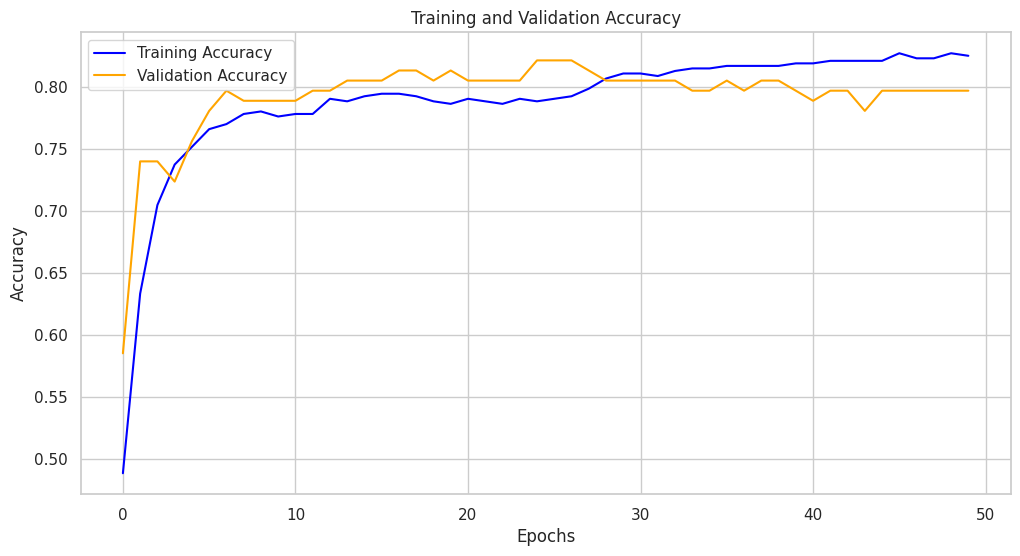

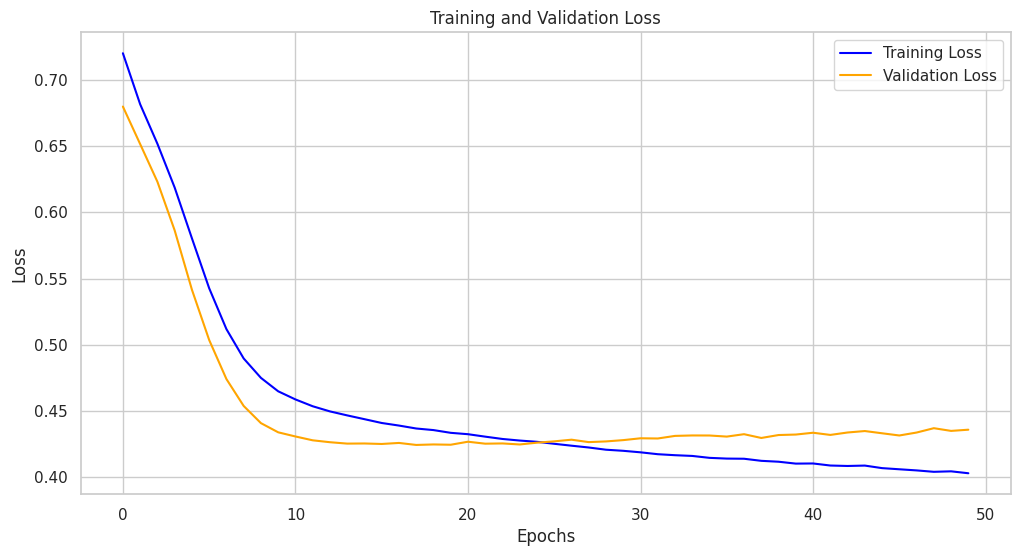

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load the cleaned dataset
file_path = "/content/cleaned_diabetes.csv"  # Replace with the path to your cleaned dataset
dataset = pd.read_csv(file_path)

# Separate features and target
X = dataset.drop(columns=["Outcome"])
y = dataset["Outcome"]

# One-hot encode the target variable if needed
# Here, it’s already binary, so no need for one-hot encoding.

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the feature set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Input layer
    Dense(8, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict on test data
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Display model architecture
model.summary()

# Visualize training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5226 - loss: 0.6968 - val_accuracy: 0.7236 - val_loss: 0.6386
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6770 - loss: 0.6346 - val_accuracy: 0.7236 - val_loss: 0.5751
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7076 - loss: 0.5932 - val_accuracy: 0.8049 - val_loss: 0.5176
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7861 - loss: 0.5233 - val_accuracy: 0.7967 - val_loss: 0.4787
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7336 - loss: 0.5248 - val_accuracy: 0.7886 - val_loss: 0.4546
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7933 - loss: 0.4651 - val_accuracy: 0.7886 - val_loss: 0.4462
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7892 - loss: 0.4476 - val_accuracy: 0.7886 - val_loss: 0.4427
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7595 - loss: 0.4991 - val_accuracy: 0.7886 - val_loss: 0.4402
Epo

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,885 (11.27 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,924 (7.52 KB)

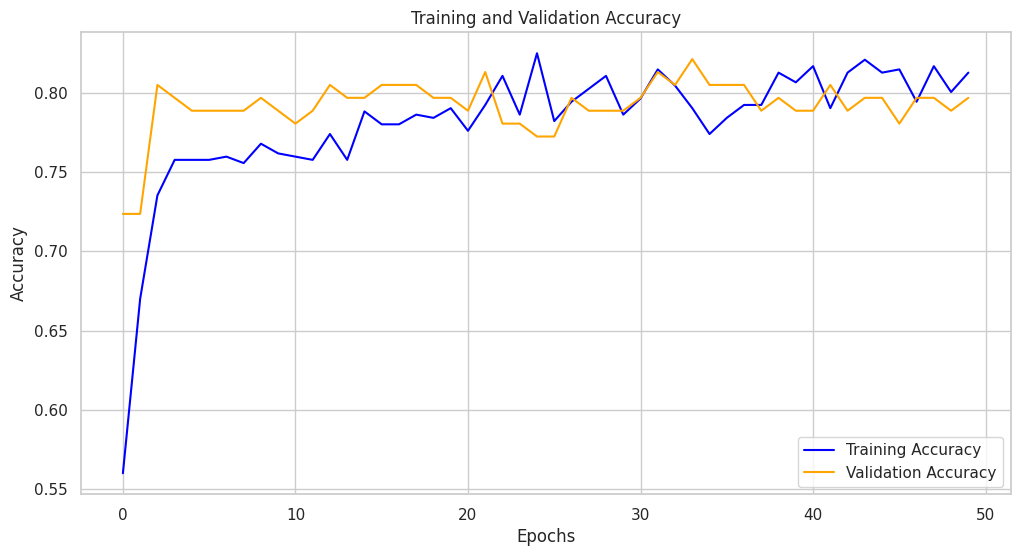

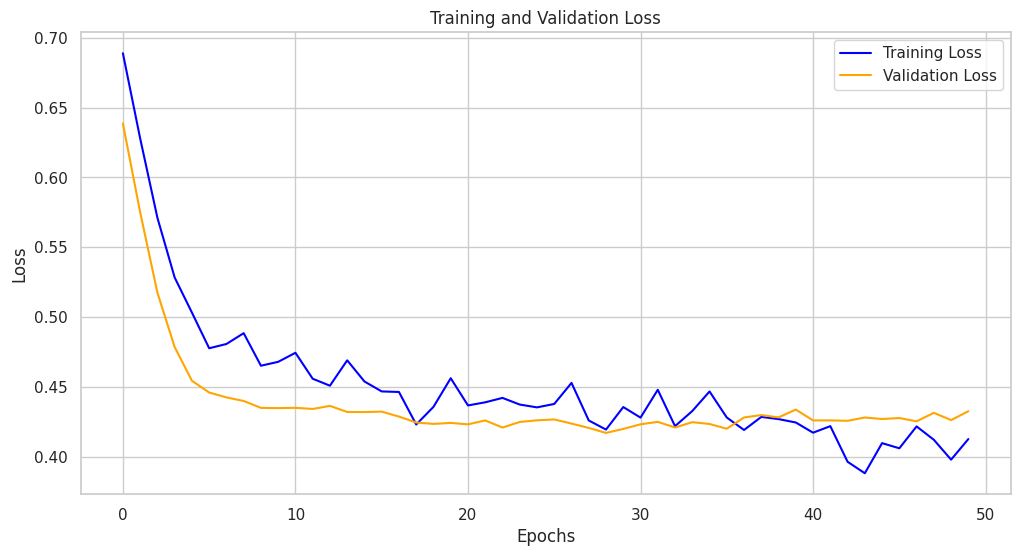

In [15]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the cleaned dataset
file_path = "/content/cleaned_diabetes.csv"  # Replace with the path to your cleaned dataset
dataset = pd.read_csv(file_path)

# Separate features and target
X = dataset.drop(columns=["Outcome"])
y = dataset["Outcome"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the feature set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the advanced neural network model with dropout regularization
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Input layer
    Dropout(0.2),  # Dropout to prevent overfitting
    Dense(16, activation='relu'),  # Hidden layer
    Dropout(0.2),  # Dropout to prevent overfitting
    Dense(8, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict on test data
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Display model architecture
model.summary()

# Visualize training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [16]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the cleaned dataset
file_path = "/content/cleaned_diabetes.csv"  # Replace with the path to your cleaned dataset
dataset = pd.read_csv(file_path)

# Separate features and target
X = dataset.drop(columns=["Outcome"])
y = dataset["Outcome"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Random Forest Classifier
print("Random Forest Classifier:")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluate Random Forest Model
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Accuracy: {rf_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_pred))

# Gradient Boosting Classifier
print("\nGradient Boosting Classifier:")
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# Evaluate Gradient Boosting Model
gb_accuracy = accuracy_score(y_test, gb_pred)
print(f"Accuracy: {gb_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, gb_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, gb_pred))

# Compare performances
print("\nComparison of Models:")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")


Random Forest Classifier:
Accuracy: 0.7727

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       100
           1       0.71      0.59      0.65        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154


Confusion Matrix:
[[87 13]
 [22 32]]

Gradient Boosting Classifier:
Accuracy: 0.7597

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       100
           1       0.69      0.57      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.76      0.75       154


Confusion Matrix:
[[86 14]
 [23 31]]

Comparison of Models:
Random Forest Accuracy: 0.7727
Gradient Boosting Accuracy: 0.7597


In [17]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define the Gradient Boosting Classifier as it performed better in Task 11
gb_model = GradientBoostingClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Perform the grid search on training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
best_pred = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, best_pred)

# Print the results
print("Best Hyperparameters:", best_params)
print(f"Best Model Accuracy on Test Set: {best_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, best_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, best_pred))


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Model Accuracy on Test Set: 0.7338

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       100
           1       0.64      0.54      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.73      0.73      0.73       154


Confusion Matrix:
[[84 16]
 [25 29]]
